# Decision Tree Predictive Analysis

Aaron Balke

December 20th, 2023

# Part I: Research Question

## Question

My question for this assessment follows my previous analysis of High Blood pressure. My question for this analysis is, "Can a decision tree classification model group patients by High Blood Pressure with an accuracy of 80% or more." The reason for this question is my logistic regression model could reach 80% accuracy and I believe it is necessary to have a more accurate model for health-related predictions.

## Goal

The goal of this analysis is to create a decision tree classification model with an accuracy of 80% or more. This would be more accurate than my previous Logistic Regression Model, and KNN Classification Model. With the more accurate model, we can make Blood Pressure predictions and analyses with confidence, which will allow us to make lifestyle and health suggestions to patients we believe will or are part of the High Blood Pressure Group.

# Part II: Method Justification

## Decision Tree Classification

Decision Tree Classification will be used over Random Forests since the main benefit of Random Forests is the prevention of overfitting. From my previous analysis of this data, our problem is not overfitting, and seems to be underfitting, so using Random Forest Classification would add needless complexity to our analysis. (Sharma)

Decision Tree classification follows a logical path through nodes, representing questions/functions. For each situation, the node's answer moves you to the next node deeper in the tree. This continues until you reach the leaves of the tree, a final predicted label for the inputted data. Each node should get you closer to the correct label, an example of a node question in our dataset would be "Is Male?" a yes response would lead to one node, and a no response would lead to another. (carpentries-incubator) 

The expected outcome is predicted labels that match our test labels, if it can accurately complete this task, the model can distinguish the High Blood Pressure group from the No High Blood Pressure Group.

## Assumption

One assumption of decision tree classification, is that when processing down the tree, the current node is the most important. At the current node, the model will make the most optimal decision with just the information it currently has, not taking into account, future decisions and possible influences further down the tree. This may lead to a tree with a inoptimal global state.
(Saini)

## Packages and Libraries
1. Python: I will be using Python as my programming language since it is a straightforward language, has strong data analysis support, and is the language I am most familiar with.
2. Jupyter Notebook: I will be running Python in a Juypter Notebook environment since Jupyter provides checkpoint functionality. This means data will not need to be loaded runtime, but rather its state is stored for later use.
3. Pandas: The Pandas package provides useful data science structures to Python in the form of DataFrames. Dataframes allow for easier manipulation of larger datasets. This is much easier than the standard list/arrays provided by Python.
3. Numpy: The Numpy package provides to this situation efficient scientific computing, and NaN values to simplify data completeness operations.
6. Sklearn: Provides train_test_split method to help evaluate model, metrics to evaluate model, Decision Tree Classifier Model Object for analysis, and GridSearchCV for automatic assessment of many model hyperparams.

# Part III: Data Preparation
## Preprocessing Goal

The Decision Tree Model does not require a lot of the previous data preparation steps we have had to do, including removing insignificant variables and multicolinear variables. We still need to convert data types and create dummy variables. The dummy variables replace categorical variables representing multiple values, with features that represent individual values. This is required for all models that require numerical inputs, such as decision tree classification models.

## Variables

| Feature | Type |
|:---------|:--------|
|  Age  | Numeric |
|  Income  | Numeric |
|  Marital  | Categorical |
|  Gender  | Categorical |
|  ReAdmis  | Categorical |
|  VitD_levels  | Numeric |
|  Doc_visits  | Numeric |
|  Full_meals_eaten  | Numeric |
|  VitD_supp  | Numeric |
|  Soft_drink  | Categorical |
|  Stroke  | Categorical |
|  Complication_risk  | Categorical |
|  Overweight  | Categorical |
|  Arthritis  | Categorical |
|  Diabetes  | Categorical |
|  Hyperlipidemia  | Categorical |
|  BackPain  | Categorical |
|  Anxiety  | Categorical |
|  Allergic_rhinitis  | Categorical |
|  Reflux_esophagitis  | Categorical |
|  Asthma  | Categorical |
|  Initial_days  | Numeric |
|  Additional_charges  | Numeric |

It is important to note I completed this analysis once without the additional_charges variable, which failed. The addition of that variable has made all the difference.

## Data Preparation

1. Drop Unused Features: This simplifies the analysis by removing all Survey and Location Based Data
2. Convert Datatypes: Object to Categories, and Boolean Strings to Numbers
3. Create Dummy Variables: Converts Categorical Features into Numerical Binary features
4. Split Data into Independent and Dependent Variables

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Import Data
df = pd.read_csv('../medical_clean.csv', index_col=0)

In [2]:
# Remove Unused Features
df.drop(
    columns = ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
               'TimeZone', 'Job', 'Children', 'Initial_admin', 'Services', 'TotalCharge', 'Item1', 'Item2', 'Item3', 'Item4',
               'Item5', 'Item6', 'Item7', 'Item8'
              ],
    inplace=True
)

In [3]:
# Convert Categorical
var_cat = ['Marital', 'Gender', 'Complication_risk']

for var in var_cat:
    df[var] = df[var].astype("category")

# Convert Boolean
var_bool = ['ReAdmis', 'Soft_drink', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes',
            'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
            'Asthma']

for var in var_bool:
    df[var] = df[var].replace({
        "Yes": 1,
        "No": 0
    })
    
df['HighBlood'] = df['HighBlood'].replace({
    "Yes": 1,
    "No": 0
})
    
var_numeric = ['Age', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'Additional_charges']

# Convert String Categorical into Separate Boolean Features (Dummy Variables)

var_cat_dumm = []

for var in var_cat:
    dummies = pd.get_dummies(df[var], prefix=var, drop_first=True).astype(np.int64)
    df.drop(var, axis=1, inplace=True)
    df = pd.concat([df, dummies], axis="columns")
    var_cat_dumm.extend(dummies.columns)
    
# Combine Names of all independent variables into 1 list
var_independent = var_numeric + var_bool + var_cat_dumm

## Export CSV

In [4]:
# Export Data to CSV
df.to_csv('./clean.csv', index=False)

# Part IV: Analysis
## Split Data

In [5]:
# Split Dependent and Independent Variables
X = df.drop(columns=['HighBlood'], axis=1).copy()
y = df['HighBlood'].copy()

# Split Data and Export CSVs for each Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify=y)

X_train.to_csv('./X_train.csv', index=False)
X_test.to_csv('./X_test.csv', index=False)
y_train.to_csv('./Y_train.csv', index=False)
y_test.to_csv('./Y_test.csv', index=False)

## Analysis Technique

In order to Analyze the Data using a Decision Tree Classifer we will need to do the following:
1. Define HyperParameter Ranges: These are the ranges for params we want to test for to find the most optimal model
2. Create a Decision Tree Classifier Object, and run it through Grid Search Cross-Validation to find the best set of hyperparameters
3. Fit the optimal model to the training data

## Analysis Code

In [6]:
# Initial Decision Tree Model (Datacamp)

# Define Hyperparam Range
params = {
    'max_depth': np.arange(1, 20),
    'min_samples_leaf' : np.arange(0.01, 1, 0.01)
}

# Initialize DecisionTreeClassifer and run GridSearchCV against it to find the most optimal params
# Default CV = 5, n_jobs fixes single core limit, scoring is Area Under the Curve
tree = DecisionTreeClassifier(random_state=69)
cv = GridSearchCV(tree, params, scoring='roc_auc', n_jobs=-1)
best = cv.fit(X_train,y_train).best_estimator_

# Create Prediction
y_pred = best.predict(X_test)

print("Optimal Model Parameters: ")
print("Max Depth", best.max_depth)
print("Min Samples Leaf", best.min_samples_leaf)

Optimal Model Parameters: 
Max Depth 5
Min Samples Leaf 0.02


# Part V: Data Summary and Implications
## Accuracy Evaluation

In order to evaluate the accuracy of this model I will use a confusion matrix, AUC Metric, Visualization, and MSE value. These are mostly being used to compare the accuracy to previous models I have created, the Logistic Regression Model and KNN Classification model.

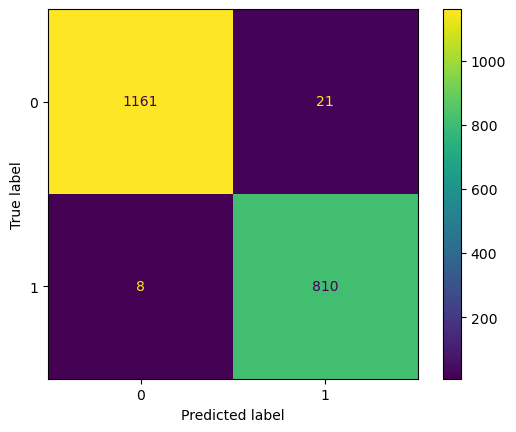

Accuracy: 0.99
Precision: 0.97
Sensitivity (Recall): 0.99
Specificity: 0.98
F-score: 0.98


In [7]:
import matplotlib.pyplot as plt
# Confusion Matrix Visualization
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# All Confusion Matrix Metrics
print(f'Accuracy: {round(metrics.accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(metrics.precision_score(y_test, y_pred),2)}')
print(f'Sensitivity (Recall): {round(metrics.recall_score(y_test, y_pred),2)}')
print(f'Specificity: {round(metrics.recall_score(y_test, y_pred, pos_label=0),2)}')
print(f'F-score: {round(metrics.f1_score(y_test, y_pred),2)}')

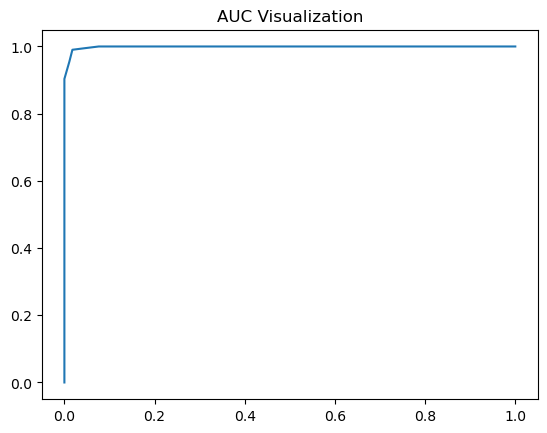

AUC:  0.9988


In [8]:
# Area-Under-Curve Visualization (Datacamp)
y_pred_prob = best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title("AUC Visualization")
plt.show()

# Area-Under-Curve Metric
auc = metrics.auc(fpr, tpr)
print("AUC: ", round(auc, 4))

In [9]:
# Mean Squared Error Metric
mse = metrics.mean_squared_error(y_test, y_pred)
print("The Mean Squared Error: ", mse)

The Mean Squared Error:  0.0145


## Results

As we can see from the confusion matrix accuracy metric of 99%, an AUC value of 99.88%, and an MSE of 0.0145, our model is very accurate and does meet our goal of outperforming my previous Logistic Regression Model of 80% accuracy. The confusion matrix shows that it barely ever makes false positive or false negative predictions, the AUC plot, showing a top left corner point, and almost 1.0 value shows the model can accurately differentiate the high blood pressure from the no high blood pressure patient distributions, and the Mean squared error being so low shows we have very minimal errors. I do not believe MSE is an accurate metric for our binary decision tree classification since MSE assumes normal distributions and regression analysis. I have included the confusion matrix, and AUC metrics to provide a more meaningful evaluation.

## Limitation

To speak on the limitations of this analysis, we have to speak on what it took to get such an accurate model. I spent quite some time building a Decision Tree Model that was completely unsuccessful before this current one. My original problem was not including the additional_charges feature from the dataset. Without that feature included, the model's accuracy and AUC values were closer to 50% - as good as randomly guessing. After adding all the features in, and eliminating insignificant features, I was able to land on additional_charges as the most important feature to our analysis. The limitation of the analysis is that this one feature is not accessible on initial patient admission, and will only be created afterwards. This model can only be used for post-admission situations.

## Recommendation

Based on this analysis, I do believe we have found a better model for predicting and classifying patients with and without High Blood Pressure, in fact I believe this is the most accurate we can get a model and it is sufficient for making health and lifestyle suggestions to patients. The one catch is it does heavily rely on the additional_charges feature, a feature only accessible after patients have been admitted. I suggest for new patients, we continue to use the less accurate Logistic Regression model, which does not require the additional_charges feature, and we can use this model for post-admission situations. An example that sticks out is for filling in null values in the dataset in the future, instead of dropping the records, or imputing with a most_freq or median value, we can now run this decision tree model against the dataset and impute with values we are 99.88% sure are accurate.

# Part VI: Demonstration

## Presentation

https://youtu.be/EMSQYSAos70

## Web Sources

Main Source was Datacamp Resources:

Hugo, B. (n.d.). Machine Learning with scikit-learn. Datacamp. from https://app.datacamp.com/learn/courses/machine-learning-with-scikit-learn

Elie, K. (n.d.). Machine Learning with Tree-Based Models in Python. Datacamp. from https://app.datacamp.com/learn/courses/machine-learning-with-tree-based-models-in-python

Kasey, J. (n.d.). Model Validation in Python. Datacamp. from https://app.datacamp.com/learn/courses/model-validation-in-python

Preprocessing & Modeling:

Beheshti, N. (2022, February 5). Cross Validation and Grid Search. Medium. https://towardsdatascience.com/cross-validation-and-grid-search-efa64b127c1b

sklearn.metrics.ConfusionMatrixDisplay. (n.d.). Scikit-Learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

scikit-learn. (2019). sklearn.model_selection.GridSearchCV — scikit-learn 0.22 documentation. Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

scikit learn. (2019). sklearn.tree.DecisionTreeClassifier — scikit-learn 0.22.1 documentation. Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Evaluation:

Can the mean squared error be used for classification? (n.d.). Cross Validated. Retrieved December 18, 2023, from https://stats.stackexchange.com/questions/46413/can-the-mean-squared-error-be-used-for-classification

Narkhede, S. (2018, June 27). Understanding AUC - ROC Curve. Medium; Towards Data Science. https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

## Other Sources

Abhigyan. (2021, November 8). Understanding Decision Tree!! Analytics Vidhya. https://medium.com/analytics-vidhya/understanding-decision-tree-3591922690a6

carpentries-incubator. Decision Trees, Random Forests, and Overfitting – Machine Learning for Biologists. (n.d.). Carpentries-Incubator.github.io. https://carpentries-incubator.github.io/ml4bio-workshop/04-trees-overfitting/index.html

Saini, A. (2021, August 29). Decision Tree Algorithm - A Complete Guide. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/

Sharma, A. (2020, May 11). Decision Tree vs. Random Forest - Which Algorithm Should you Use? Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/